<small>

Author: Felipe Garaycochea Lozada   
Student Code: 22500219

</small>

# 📚 Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from plotly.subplots import make_subplots
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

# 🗂️ Dataset Load

In [63]:
data = pd.read_csv("dataset/preprocessed_dataset.csv")
data.head()

,sadness,euphoric,exhausted,sleep_dissorder,mood_swing,suicidal_thoughts,anorxia,authority_respect,try_explanation,aggressive_response,ignore_move_on,nervous_break_down,admit_mistakes,overthinking,sexual_activity,concentration,optimisim,expert_diagnose
0,3,1,2,2,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,3,1,3,2,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,2,4,2,2,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,3,1,3,4,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,3,3,2,2,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


# 🛠️ Feature Engineering

In [64]:
data.describe()

,sadness,euphoric,exhausted,sleep_dissorder,sexual_activity,concentration,optimisim
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.550000,1.933333,2.633333,2.458333,4.741667,4.250000,4.466667
std,0.924458,0.923396,1.020243,0.977871,2.010459,1.797524,1.991298
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000
50%,3.000000,2.000000,3.000000,2.000000,5.000000,4.000000,4.000000
75%,3.000000,2.000000,3.250000,3.000000,6.000000,5.000000,6.000000
max,4.000000,4.000000,4.000000,4.000000,9.000000,8.000000,9.000000


## 🎯 Variable Selection

In [65]:
target = "expert_diagnose"
X = data.drop(columns=target)
y = data[target]

In [66]:
X.columns

Index(['sadness', 'euphoric', 'exhausted', 'sleep_dissorder', 'mood_swing',
       'suicidal_thoughts', 'anorxia', 'authority_respect', 'try_explanation',
       'aggressive_response', 'ignore_move_on', 'nervous_break_down',
       'admit_mistakes', 'overthinking', 'sexual_activity', 'concentration',
       'optimisim'],
      dtype='object')

## 🔄 Variable Conversion

We apply one-hot encoding to transform the categorical variables into a numerical format.

In [67]:
X

,sadness,euphoric,exhausted,sleep_dissorder,mood_swing,suicidal_thoughts,anorxia,authority_respect,try_explanation,aggressive_response,ignore_move_on,nervous_break_down,admit_mistakes,overthinking,sexual_activity,concentration,optimisim
0,3,1,2,2,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4
1,3,1,3,2,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5
2,2,4,2,2,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7
3,3,1,3,4,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2
4,3,3,2,2,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4,1,3,2,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2,5,3
116,2,2,2,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6,7,8
117,3,2,3,2,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1,5,3
118,3,2,1,1,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7,7,7


In [68]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head(3)

,sadness,euphoric,exhausted,sleep_dissorder,sexual_activity,concentration,optimisim,mood_swing_YES,suicidal_thoughts_YES,anorxia_YES,authority_respect_YES,try_explanation_YES,aggressive_response_YES,ignore_move_on_YES,nervous_break_down_YES,admit_mistakes_YES,overthinking_YES
0,3,1,2,2,3,3,4,1,1,0,0,1,0,0,1,1,1
1,3,1,3,2,4,2,5,0,1,0,0,0,0,0,0,0,0
2,2,4,2,2,6,5,7,1,0,0,0,1,1,0,1,1,0


## 🌡️ Heat Map: Correlation

In [69]:
X

,sadness,euphoric,exhausted,sleep_dissorder,sexual_activity,concentration,optimisim,mood_swing_YES,suicidal_thoughts_YES,anorxia_YES,authority_respect_YES,try_explanation_YES,aggressive_response_YES,ignore_move_on_YES,nervous_break_down_YES,admit_mistakes_YES,overthinking_YES
0,3,1,2,2,3,3,4,1,1,0,0,1,0,0,1,1,1
1,3,1,3,2,4,2,5,0,1,0,0,0,0,0,0,0,0
2,2,4,2,2,6,5,7,1,0,0,0,1,1,0,1,1,0
3,3,1,3,4,3,2,2,1,1,1,0,1,0,0,0,0,0
4,3,3,2,2,5,5,6,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4,1,3,2,2,5,3,0,1,0,0,1,0,1,0,0,1
116,2,2,2,1,6,7,8,1,0,0,0,0,1,0,0,0,1
117,3,2,3,2,1,5,3,1,0,1,1,0,0,0,1,0,1
118,3,2,1,1,7,7,7,0,1,1,0,1,1,1,0,1,1


<Axes: >

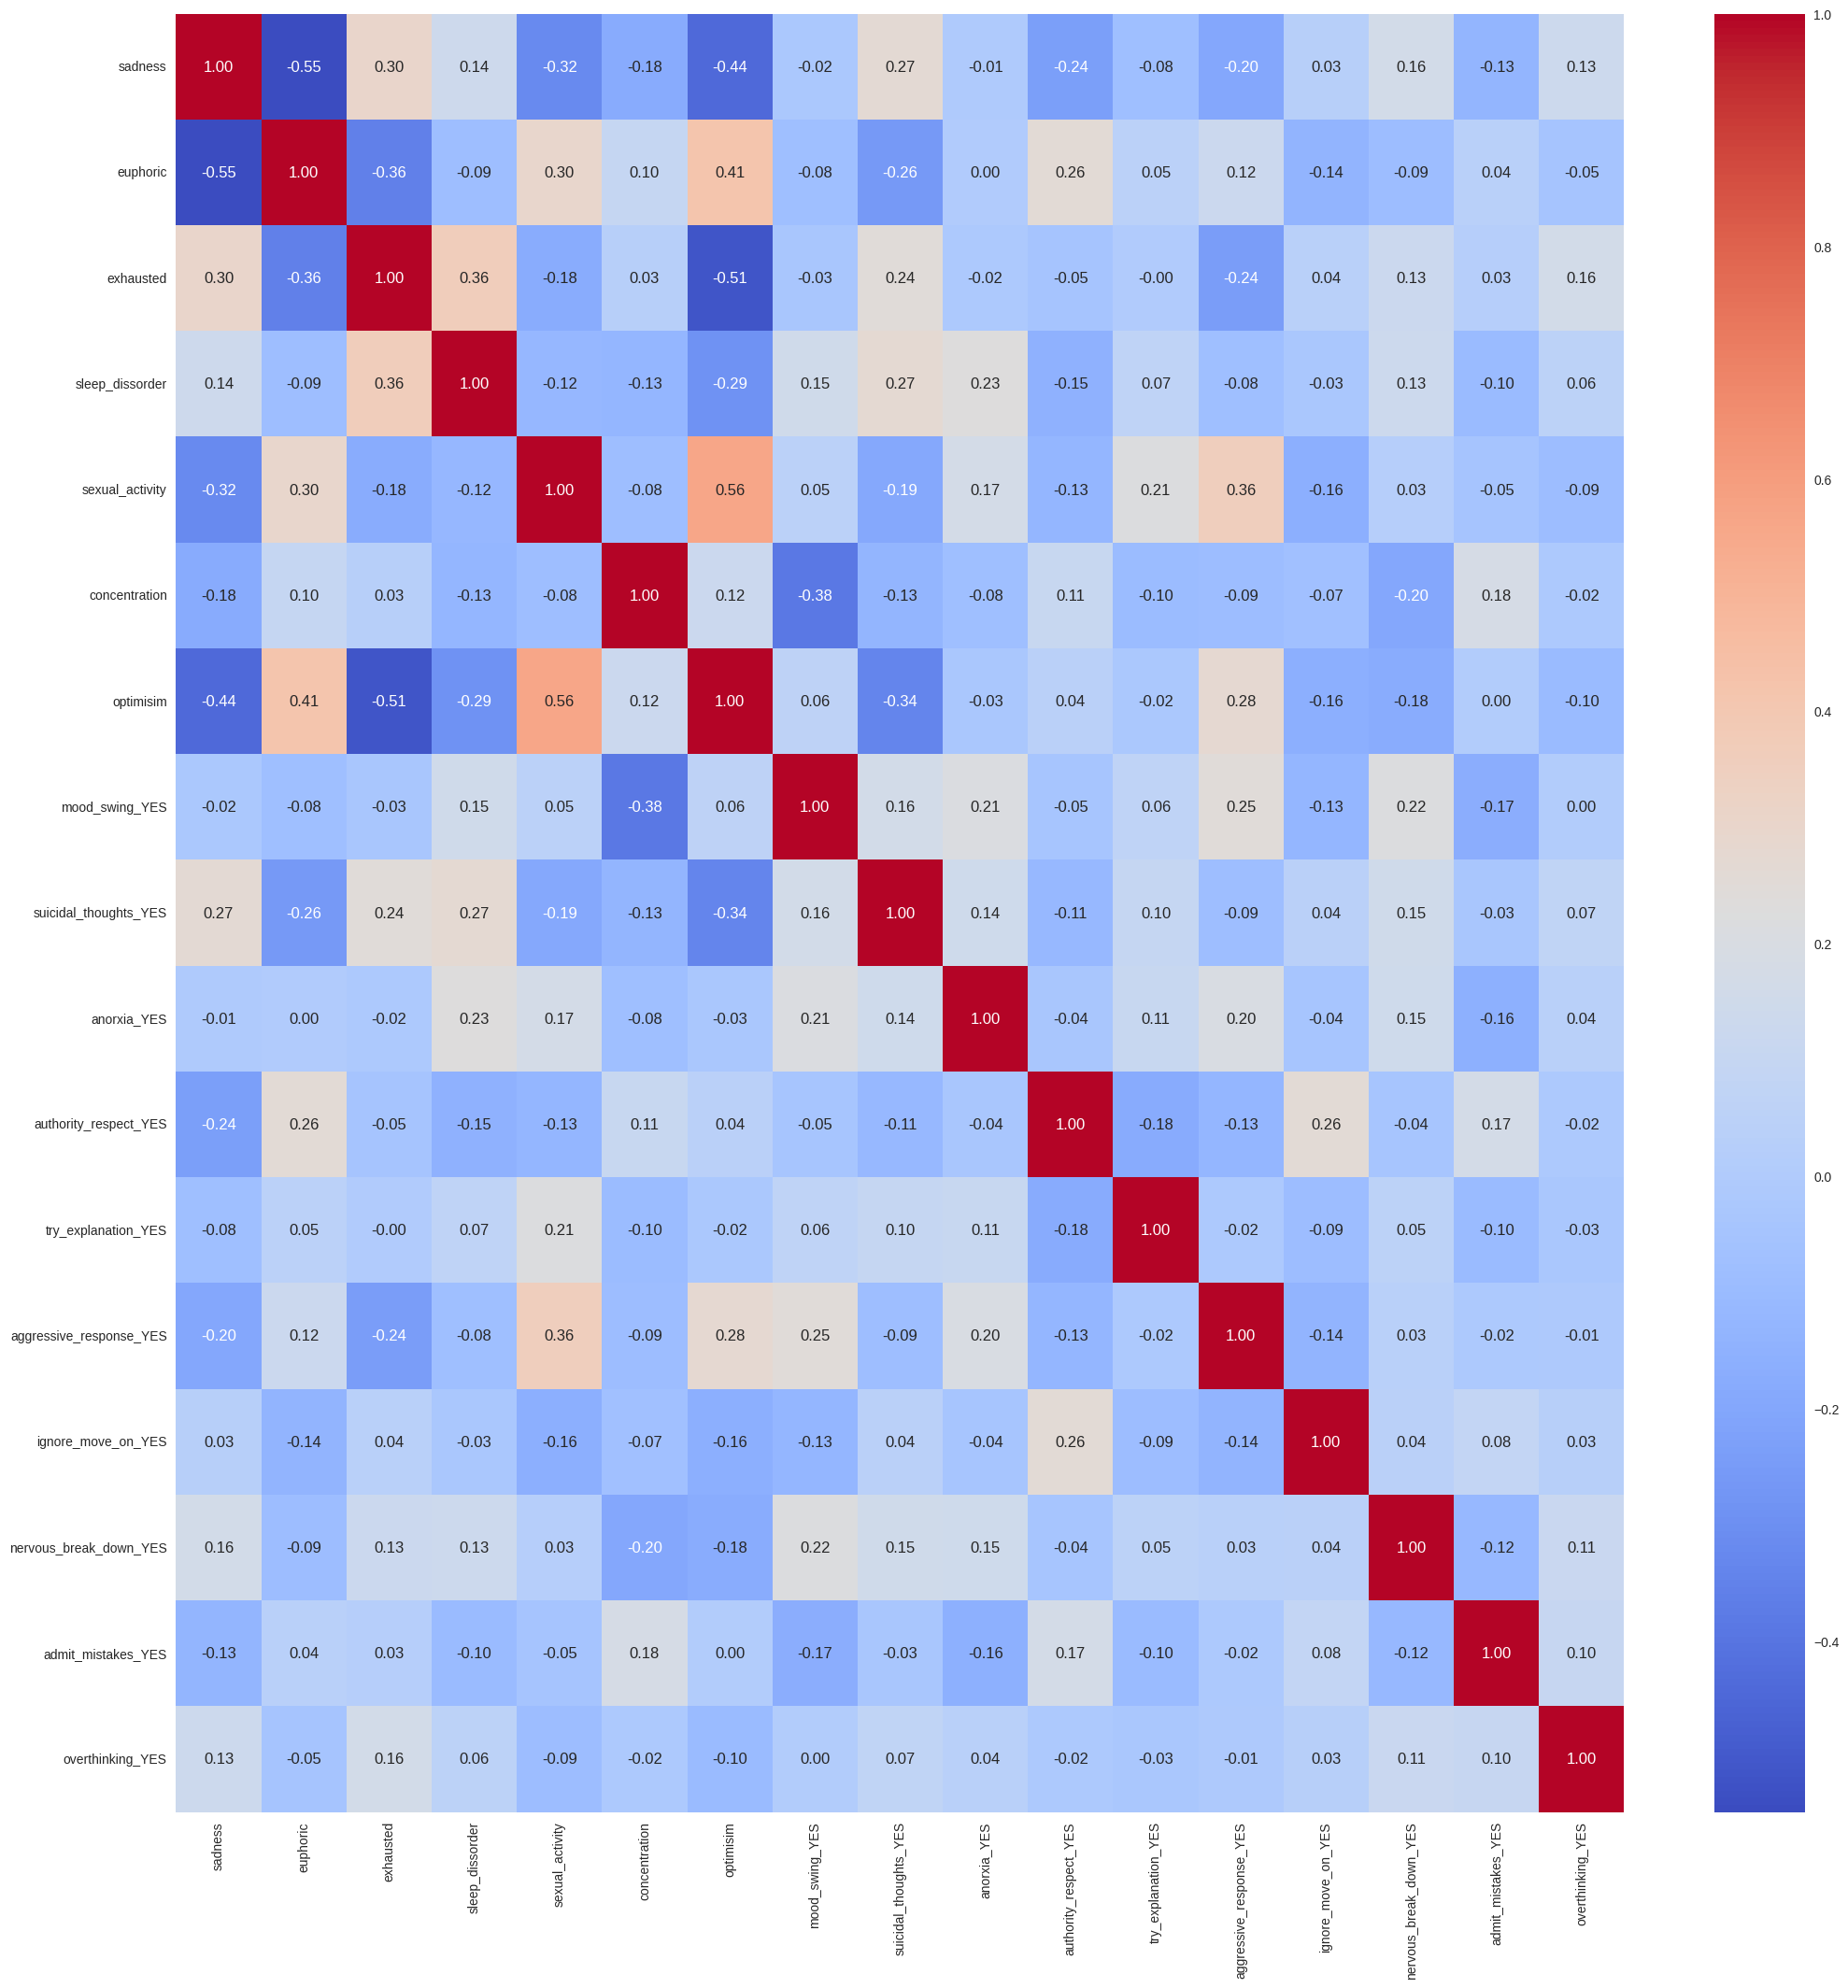

In [70]:
plt.figure(figsize=(25, 25))
correlacion = X.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")

> According to the correlation heat map analysis, the independent variables do not show high correlations with each other, indicating low collinearity.

## 🧹 Filter by Variance 0

In [71]:
deleted = data.columns[data.nunique() == 1].tolist()
print("Columns eliminated by zero variance:", deleted)
df_cleaned = data.loc[:, data.nunique() > 1]

Columns eliminated by zero variance: []


## 🧠 Variables importance

<Axes: >

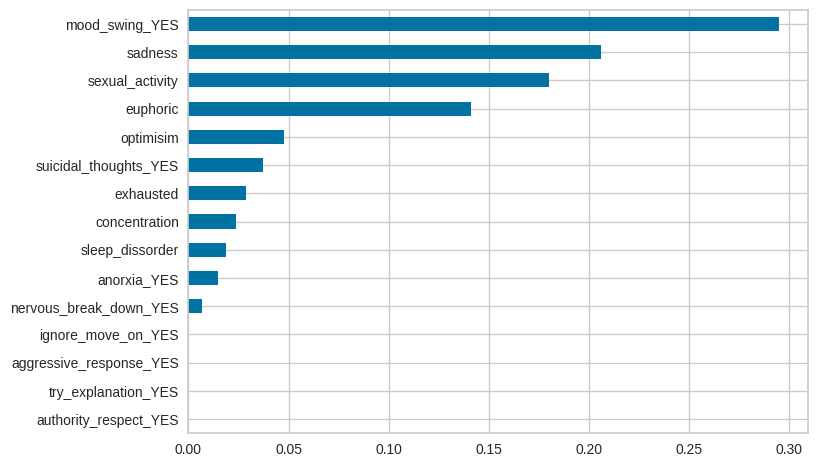

In [72]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)
dtc_importances = pd.Series(dtc.feature_importances_, index=X.columns)
dtc_importances.sort_values(ascending=False).head(15).sort_values().plot(kind="barh")

> In this case, we are going to select the 11 most important variables according to the Decision Tree model.

In [73]:
X

,sadness,euphoric,exhausted,sleep_dissorder,sexual_activity,concentration,optimisim,mood_swing_YES,suicidal_thoughts_YES,anorxia_YES,authority_respect_YES,try_explanation_YES,aggressive_response_YES,ignore_move_on_YES,nervous_break_down_YES,admit_mistakes_YES,overthinking_YES
0,3,1,2,2,3,3,4,1,1,0,0,1,0,0,1,1,1
1,3,1,3,2,4,2,5,0,1,0,0,0,0,0,0,0,0
2,2,4,2,2,6,5,7,1,0,0,0,1,1,0,1,1,0
3,3,1,3,4,3,2,2,1,1,1,0,1,0,0,0,0,0
4,3,3,2,2,5,5,6,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4,1,3,2,2,5,3,0,1,0,0,1,0,1,0,0,1
116,2,2,2,1,6,7,8,1,0,0,0,0,1,0,0,0,1
117,3,2,3,2,1,5,3,1,0,1,1,0,0,0,1,0,1
118,3,2,1,1,7,7,7,0,1,1,0,1,1,1,0,1,1


In [74]:
features = dtc_importances.sort_values(ascending=False).head(11).index.tolist()
X = X[features]
X.columns.to_list()

['mood_swing_YES',
 'sadness',
 'sexual_activity',
 'euphoric',
 'optimisim',
 'suicidal_thoughts_YES',
 'exhausted',
 'concentration',
 'sleep_dissorder',
 'anorxia_YES',
 'nervous_break_down_YES']

# 🤖 Models to be applied

- 📈 **Logistic Regression** (Linear)
- 🌳 **Decision Tree** (Non-Linear)

## 🔀 Split: Train, Validation and Test sets

To effectively evaluate the performance and generalization of our models, the dataset is divided into three parts: training, validation, and test sets.

- **Training set**: Used to train the machine learning models.
- **Validation set**: Used to fine-tune the model and select hyperparameters.
- **Test set**: Used to evaluate the final performance of the selected model on raw data.

In [75]:
X_train_final, X_test, Y_train_final, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, Y_train_final, test_size=0.2, random_state=42, stratify=Y_train_final
)

## Scaling 

In [76]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_type = "Standard"

if scaler_type == "Standard":
    scaler = StandardScaler()
else:
    if scaler_type == "MinMax":
        scaler = MinMaxScaler((-1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_final_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

In [77]:
scaled = scaler.fit_transform(X)
pd.DataFrame(scaled, columns=X.columns)

,mood_swing_YES,sadness,sexual_activity,euphoric,optimisim,suicidal_thoughts_YES,exhausted,concentration,sleep_dissorder,anorxia_YES,nervous_break_down_YES
0,1.051315,0.488813,-0.869935,-1.014999,-0.235336,1.051315,-0.623370,-0.698317,-0.470670,-0.788430,0.967204
1,-0.951190,0.488813,-0.370451,-1.014999,0.268955,1.051315,0.360898,-1.256970,-0.470670,-0.788430,-1.033908
2,1.051315,-0.597438,0.628518,2.247498,1.277536,-0.951190,-0.623370,0.418990,-0.470670,-0.788430,0.967204
3,1.051315,0.488813,-0.869935,-1.014999,-1.243917,1.051315,0.360898,-1.256970,1.583164,1.268344,-1.033908
4,-0.951190,0.488813,0.129033,1.159999,0.773246,-0.951190,-0.623370,0.418990,-0.470670,-0.788430,0.967204
...,...,...,...,...,...,...,...,...,...,...,...
115,-0.951190,1.575064,-1.369419,-1.014999,-0.739626,1.051315,0.360898,0.418990,-0.470670,-0.788430,-1.033908
116,1.051315,-0.597438,0.628518,0.072500,1.781827,-0.951190,-0.623370,1.536297,-1.497587,-0.788430,-1.033908
117,1.051315,0.488813,-1.868904,0.072500,-0.739626,-0.951190,0.360898,0.418990,-0.470670,1.268344,0.967204
118,-0.951190,0.488813,1.128002,0.072500,1.277536,1.051315,-1.607638,1.536297,-1.497587,1.268344,-1.033908


## 🛠️ Hyperparameter Selection

In [227]:
def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"\n--- Evaluation on {dataset_name} set ---" if dataset_name else "\n--- Model Evaluation ---")
    print(classification_report(y_true, y_pred))


### 📈 Logistic Regression

In [228]:
C_vals = np.logspace(-3, 2, 25)

results = [
    (
        (model := LogisticRegression(C=c, random_state=42, solver='newton-cg')).fit(X_train_scaled, y_train),
        c
    )
    for c in C_vals
]

train_scores = [model.score(X_train_scaled, y_train) for model, _ in results]
val_scores = [model.score(X_val_scaled, y_val) for model, _ in results]

fig = go.Figure()
fig.add_trace(go.Scatter(x=C_vals, y=train_scores, mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=C_vals, y=val_scores, mode='lines+markers', name='Validation Accuracy'))

fig.update_layout(
    title='Accuracy vs C (Logistic Regression)',
    xaxis=dict(title='C', type='log'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.05, y=0.95)
)

fig.show()


<small> 📓 Graph in: outputs/Accuracy vs C (Logistic Regression).png </small>

> Looking at the curve, we can see that for low values ​​of C, both training and validation accuracy are low. As C increases, accuracy improves. In this case, we'll use C = 0.01778279. At this point, the model achieves good validation accuracy (approximately 90%) while maintaining a reasonable gap with the training accuracy.

In [229]:
clf_log_model = LogisticRegression(C=0.01778279, solver='newton-cg', random_state=42)
clf_log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01778279, random_state=42, solver='newton-cg')

#### 📊 Evaluation

In [230]:
y_pred_train = clf_log_model.predict(X_train_scaled)
evaluate_model(y_train, y_pred_train, dataset_name="Training")

y_pred_val = clf_log_model.predict(X_val_scaled)
evaluate_model(y_val, y_pred_val, dataset_name="Validation")


--- Evaluation on Training set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.82      0.90        17
Bipolar Type-2       1.00      1.00      1.00        20
    Depression       1.00      0.85      0.92        20
        Normal       0.76      1.00      0.86        19

      accuracy                           0.92        76
     macro avg       0.94      0.92      0.92        76
  weighted avg       0.94      0.92      0.92        76


--- Evaluation on Validation set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.60      0.75         5
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       1.00      1.00      1.00         5
        Normal       0.83      1.00      0.91         5

      accuracy                           0.90        20
     macro avg       0.92      0.90      0.89        20
  weighted avg       0.92      0.90      0.89        20



>Training set: The model shows outstanding performance on the training set, with an overall accuracy of **97%**. The precision, recall, and F1-score metrics are consistently high for all classes.

> Validation set: The model achieves an accuracy of **90%** on the validation set, indicating good overall performance when classifying unseen data. The "Bipolar Type-2" class is perfectly classified, with an F1-score of 1.00, the "Bipolar Type-1" class also shows good performance (F1-score = 0.92), albeit with lower accuracy and in the "Normal" class, the model maintains perfect presicion but has a lower recall (0.50), indicating that some instances of this class were not correctly identified.

### 🌲 Decision Tree Classifier

#### Impact of Hyperparameters on Decision Tree Performance

In [231]:
hp = [
    ('max_leaf_nodes', range(2, 50, 5)),
    ('max_depth', range(2, 8)),
    ('min_samples_leaf', range(1, 50, 5))
]

fig = make_subplots(1, 3, subplot_titles=[n.replace('_',' ').title() for n,_ in hp])

for i, (param, vals) in enumerate(hp, 1):
    stats = [
        (
            (model := DecisionTreeClassifier(random_state=42)
                     .set_params(**{param: v})
                     .fit(X_train_scaled, y_train)),
            model.score(X_train_scaled, y_train),
            model.score(X_val_scaled, y_val),
        )
        for v in vals
    ]
    fig.add_trace(go.Scatter(x=list(vals), y=[train for _, train, val in stats],
                             mode='lines+markers', name=f'Train ({param})'), 1, i)
    fig.add_trace(go.Scatter(x=list(vals), y=[val for _, train, val in stats],
                             mode='lines+markers', name=f'Validation ({param})'), 1, i)

fig.show()

<small> 📓 Graph in: outputs/Hyperparameters on Decision Tree Performance.png</small>

> In the "Maximum Depth" graph, we see that the validation metric achieves good performance and stabilizes around a high value when max_depth is 5, while the training metric has already reached a value close to its maximum. In this case, we'll use 5 for Maximum Depth, as it allows us to capture sufficient model complexity without incurring an excessive risk of overfitting.

#### ⚙️ Model Training

In [232]:

clf_dtc_model = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_dtc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

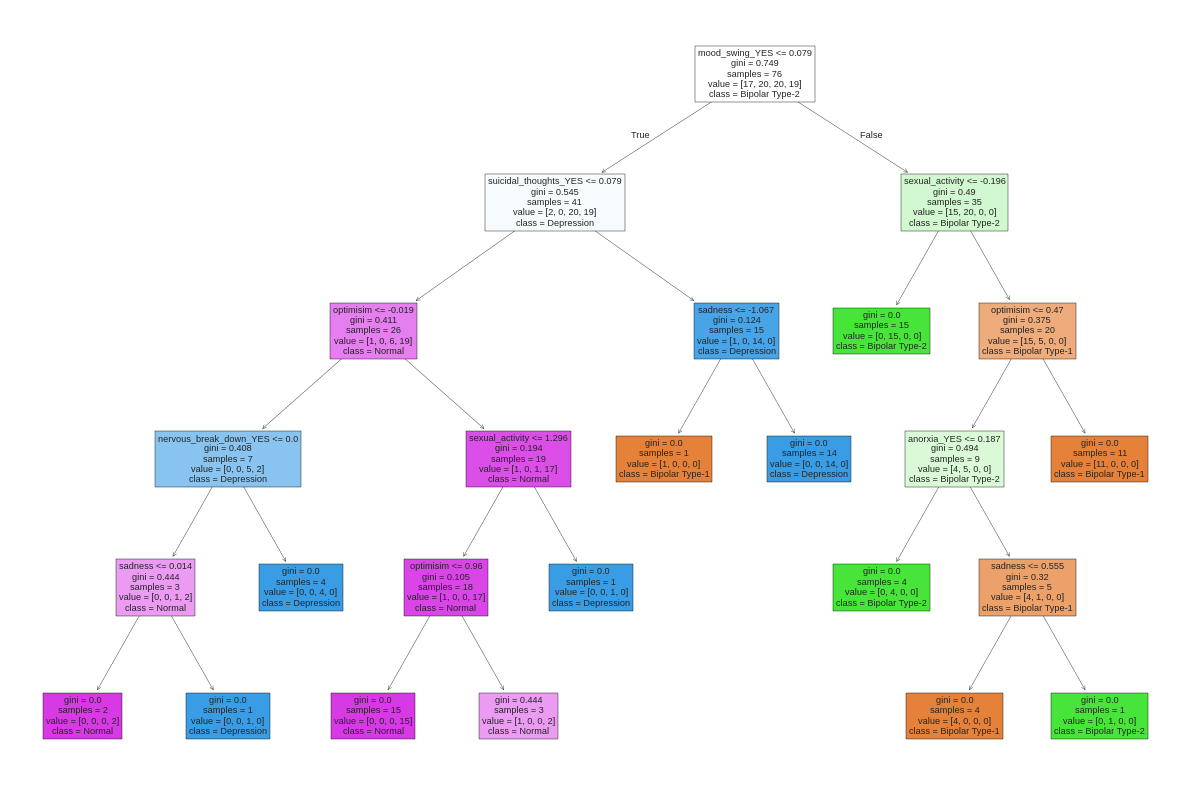

In [233]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf_dtc_model, feature_names=X.columns, class_names=clf_dtc_model.classes_, filled=True)
plt.show()

#### 📊 Evaluation

In [234]:
y_pred_dtc_train = clf_dtc_model.predict(X_train_scaled)
evaluate_model(y_train, y_pred_dtc_train, dataset_name="Training")

y_pred_dtc_val = clf_dtc_model.predict(X_val_scaled)
evaluate_model(y_val, y_pred_dtc_val, dataset_name="Validation")



--- Evaluation on Training set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.94      0.97        17
Bipolar Type-2       1.00      1.00      1.00        20
    Depression       1.00      1.00      1.00        20
        Normal       0.95      1.00      0.97        19

      accuracy                           0.99        76
     macro avg       0.99      0.99      0.99        76
  weighted avg       0.99      0.99      0.99        76


--- Evaluation on Validation set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.60      0.75         5
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       0.71      1.00      0.83         5
        Normal       1.00      0.80      0.89         5

      accuracy                           0.85        20
     macro avg       0.89      0.85      0.85        20
  weighted avg       0.89      0.85      0.85        20



>Training Set: The model achieved an accuracy of 99%, indicating excellent learning performance. The classes "Depression" and "Bipolar Type-2" were classified perfectly, with f1-scores of 1.00. The "Normal" class also showed very high performance with a f1-score of 0.97, while "Bipolar Type-1" had slightly lower recall (0.94) but maintained perfect precision, resulting in an f1-score of 0.97.

> Validation Set: The model reached an accuracy of 85% on the validation set, reflecting decent generalization with some performance drops relative to training. "Bipolar Type-2" achieved the highest performance with a f1-score of 0.91, followed by "Normal" with 0.89. "Depression" was classified with perfect recall but lower precision, yielding a f1-score of 0.83. "Bipolar Type-1" showed the largest discrepancy, with a f1-score of 0.75, caused by lower recall (0.60), indicating that some instances were misclassified.

### Support Vector Machine (SVR)

In [235]:
C_vals = np.logspace(-3, 2, 15)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cw_opts = [None, 'balanced']
titles = [f'{k} / {cw or "no balanceado"}' for cw in cw_opts for k in kernels]

f = make_subplots(rows=2, cols=4, subplot_titles=titles)

for r, cw in enumerate(cw_opts, 1):
    for c, k in enumerate(kernels, 1):
        res = [((m := SVC(kernel=k, C=cv, random_state=42, class_weight=cw, tol=1e-4).fit(X_train_scaled, y_train)).score(X_train_scaled, y_train), m.score(X_val_scaled, y_val)) for cv in C_vals]
        f.add_trace(go.Scatter(x=C_vals, y=[t for t,_ in res], mode='lines', name=f'train_{k}_{cw}'), r, c)
        f.add_trace(go.Scatter(x=C_vals, y=[u for _,u in res], mode='lines', name=f'test_{k}_{cw}'), r, c)

f.update_xaxes(type='log', title='C')
f.update_yaxes(title='Accuracy')
f.update_layout(height=600, width=1100, showlegend=False)
f.show()

Overall, the graphs show similar results, with considerable variations in the value of C. In the "linear" graph, the validation accuracy remains consistently high and stable as C increases, while the training accuracy is also high. This suggests that the linear kernel is robust and strikes a good balance between fitting the training data and generalizing to unseen data, especially when using class_weight='balanced'. In this case, we chose kernel='linear' and class_weight='balanced' with C=0.01178769, where the training and validation accuracies are already very high, stable, and with a C value that is quite good for performance.

#### ⚙️ Model Training

In [236]:
clf_svc = SVC(C=0.01178769, random_state=42, kernel='linear', class_weight='balanced')
clf_svc.fit(X_train_scaled, y_train)

SVC(C=0.01178769, class_weight='balanced', kernel='linear', random_state=42)

In [237]:
y_pred_clf_svc_train = clf_svc.predict(X_train_scaled)
evaluate_model(y_train, y_pred_clf_svc_train, dataset_name="Training")

y_pred_clf_svc_val = clf_svc.predict(X_val_scaled)
evaluate_model(y_val, y_pred_clf_svc_val, dataset_name="Validation")



--- Evaluation on Training set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.76      0.87        17
Bipolar Type-2       1.00      1.00      1.00        20
    Depression       1.00      0.85      0.92        20
        Normal       0.73      1.00      0.84        19

      accuracy                           0.91        76
     macro avg       0.93      0.90      0.91        76
  weighted avg       0.93      0.91      0.91        76


--- Evaluation on Validation set ---
                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.60      0.75         5
Bipolar Type-2       0.83      1.00      0.91         5
    Depression       1.00      1.00      1.00         5
        Normal       0.83      1.00      0.91         5

      accuracy                           0.90        20
     macro avg       0.92      0.90      0.89        20
  weighted avg       0.92      0.90      0.89        20



> Training Set: The model achieved an accuracy of 91%, indicating solid performance during training, though with some variability across classes. "Bipolar Type-2" stood out with perfect precision, recall, and f1-score (1.00), followed by "Depression" with a strong f1-score of 0.92 despite a slightly lower recall (0.85). "Normal" also showed good recall (1.00) but lower precision (0.73), leading to a moderate f1-score of 0.84. The weakest training performance was seen in "Bipolar Type-1", which had high precision (1.00) but lower recall (0.76), resulting in a f1-score of 0.87. 

> Validation Set: The model achieved an accuracy of 90%, demonstrating good generalization. "Depression" performed perfectly, with an f1-score of 1.00. "Bipolar Type-2" and "Normal" followed closely, both with f1-scores of 0.91, showing balanced and reliable classification. "Bipolar Type-1" remained the most challenging class, with a lower recall (0.60) despite perfect precision, yielding a f1-score of 0.75.

## Final models training

In [238]:
clf_log_model_final = LogisticRegression(C=0.01778279, solver='newton-cg', random_state=42)
clf_log_model_final.fit(X_train_final_scaled, Y_train_final)

clf_dtc_model_final = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_dtc_model_final.fit(X_train_final_scaled, Y_train_final)

clf_svc_final = SVC(C=0.01178769, random_state=42, kernel='linear', class_weight='balanced')
clf_svc_final.fit(X_train_final_scaled, Y_train_final)

classes, classifiers = sorted(y_train.unique()), [clf_dtc_model_final, clf_log_model_final, clf_svc_final]
print(classes)
print(classifiers)

['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']
[DecisionTreeClassifier(max_depth=5, random_state=42), LogisticRegression(C=0.01778279, random_state=42, solver='newton-cg'), SVC(C=0.01178769, class_weight='balanced', kernel='linear', random_state=42)]


## 🧪 Model Comparison

In this section, the trained models will be compared using various evaluation metrics to determine which one performs best in the classification task.

The following elements will be used:

- **Classification report:** to view detailed metrics such as precision, recall, and F1-score per class.

- **Confusion matrix:** to visualize classification errors and see which classes are most frequently confused.

- **ROC AUC curves:** to analyze the performance of the models in terms of sensitivity vs. specificity for each class.

- **F1-score comparison graph:** which summarizes the performance by class and by model in a visual manner.

### 📋 Classification Reports

In [239]:
def plot_classification_reports(x, y_true, classifiers, classes, classifier_names=None):
    if classifier_names is None:
        classifier_names = [f"Model {i+1}" for i in range(len(classifiers))]

    fig, axes = plt.subplots(1, len(classifiers), figsize=(5 * len(classifiers), 6))
    axes = np.ravel(axes)

    for i, (clf, name) in enumerate(zip(classifiers, classifier_names)):
        y_pred = clf.predict(x)
        report_dict = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
        df_display = pd.DataFrame(report_dict).T.iloc[:-3][['precision', 'recall', 'f1-score', 'support']].copy()
        df_heat = df_display.astype(float)

        mask = pd.DataFrame(False, index=df_heat.index, columns=df_heat.columns)
        mask['support'] = True

        ax = axes[i]
        sns.heatmap(df_heat, annot=df_display.round(2), fmt='', cmap='Blues',
                    linewidths=0.5, cbar=True, mask=mask, ax=ax, vmin=0.0, vmax=1.0)

        for y_idx, label in enumerate(df_display.index):
            support_val = df_display.loc[label, 'support']
            ax.add_patch(plt.Rectangle((3, y_idx), 1, 1, fill=True, color='#e0e0e0', lw=0))
            ax.text(3.5, y_idx + 0.5, f'{support_val:.0f}', va='center', ha='center', color='black')

        ax.set_title(f'{name} - Classification Report')
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Classes')
        ax.set_xticklabels(['precision', 'recall', 'f1-score', 'support'])

    plt.tight_layout()
    plt.show()


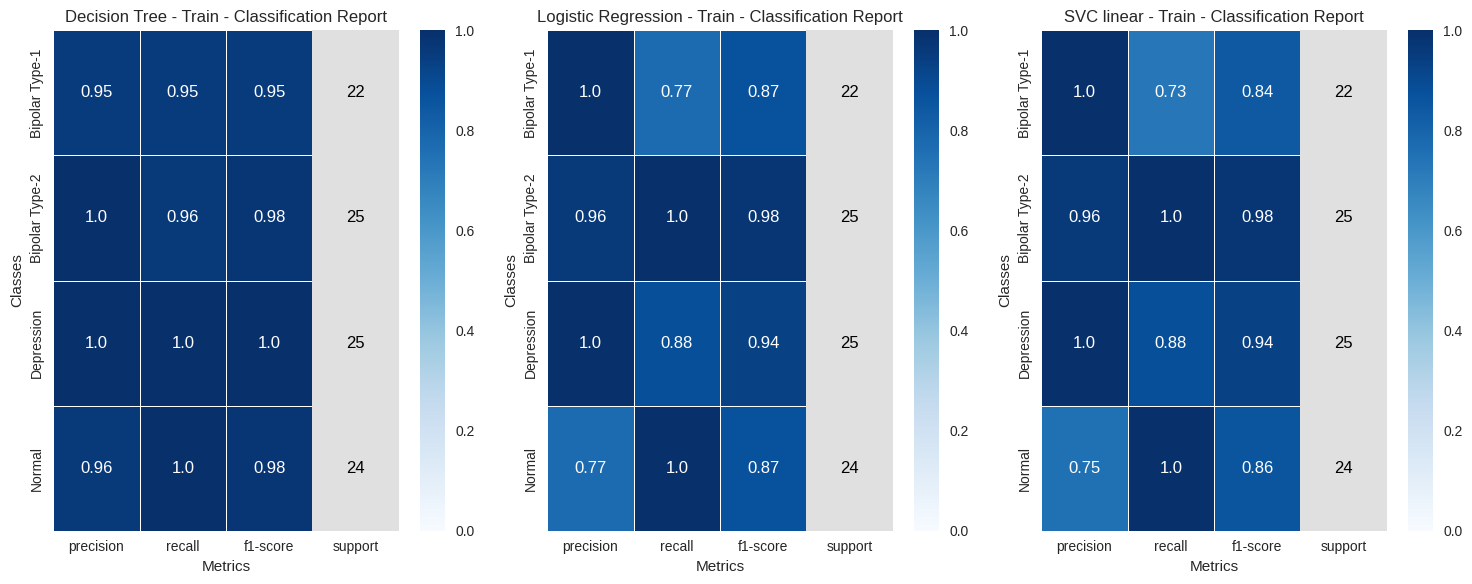

In [240]:
classifier_names =  ['Decision Tree - Train', 'Logistic Regression - Train', 'SVC linear - Train']
plot_classification_reports(X_train_final_scaled, Y_train_final, classifiers, classes, classifier_names)

When comparing the three models trained on the training set, we observe that Decision Tree presents the highest performance across all classes, with f1 scores close to or equal to 1.0, indicating a high learning capacity. In contrast, both Logistic Regression and Linear SVC show weaknesses especially in the "Bipolar Type-1" class, with recalls of 0.77 and 0.73 respectively, suggesting that they tend not to correctly identify all cases in this class.

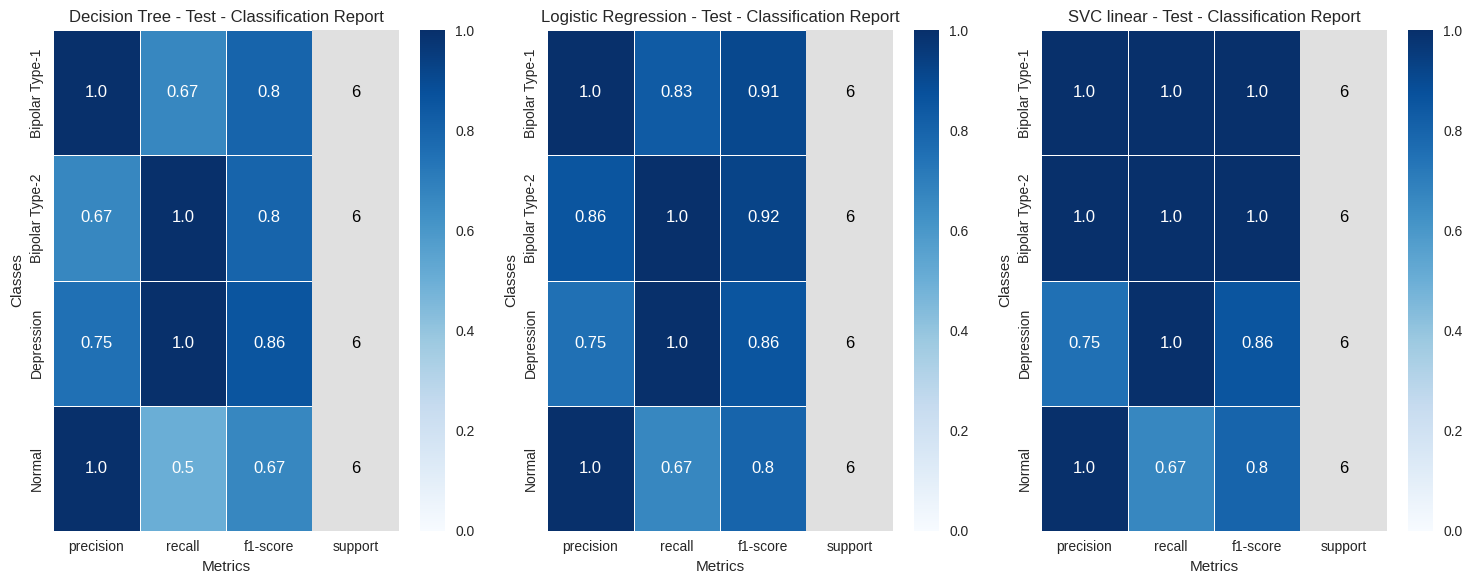

In [241]:
classifier_names =  ['Decision Tree - Test', 'Logistic Regression - Test', 'SVC linear - Test']

plot_classification_reports(X_test_scaled, y_test, classifiers, classes, classifier_names)

Comparing the three models trained on the test set, an overall improvement is observed in the linear models compared to the decision tree model. The logistic regression model achieves f1 scores close to 0.90 in most classes, with a slight decrease in the "Normal" class. The SVC linear model shows the best overall performance, with perfect f1 scores (1.0) in "Bipolar Type 1" and "Bipolar Type 2," and consistent values ​​in "Depression" and "Normal." This indicates that the linear models not only generalize better but also maintain a good balance between precision and recall on the test set.

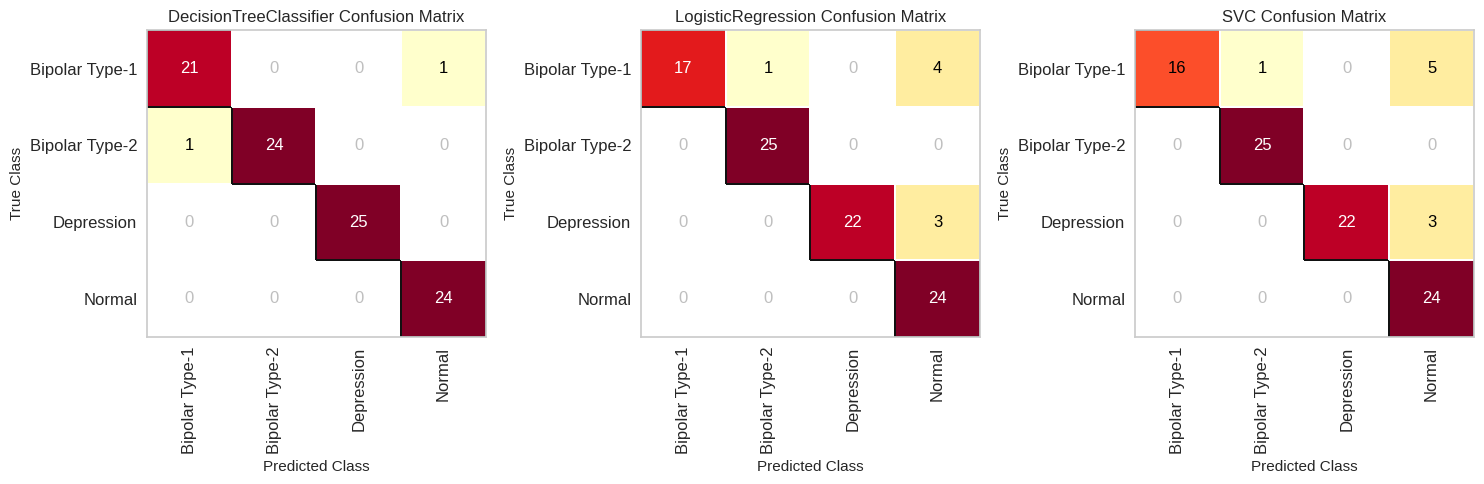

In [242]:
fig, axe = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ConfusionMatrix(classifiers[0], classes=classes, support=True, ax=axe[0]),
              ConfusionMatrix(classifiers[1], classes=classes, support=True, ax=axe[1]),
              ConfusionMatrix(classifiers[2], classes=classes, support=True, ax=axe[2]),
              ]
for viz in visualgrid:
  viz.fit(X_train_final_scaled, Y_train_final)
  viz.score(X_train_final_scaled, Y_train_final)
  viz.finalize()
fig.show()

The confusion matrices of the three models applied to the training set are compared. The Decision Tree model shows almost perfect performance. Logistic Regression and SVC, on the other hand, make some errors, especially in the classification of "Bipolar Type-1," which tends to be confused with "Normal," although they maintain perfect classification for "Bipolar Type-2" and "Normal."

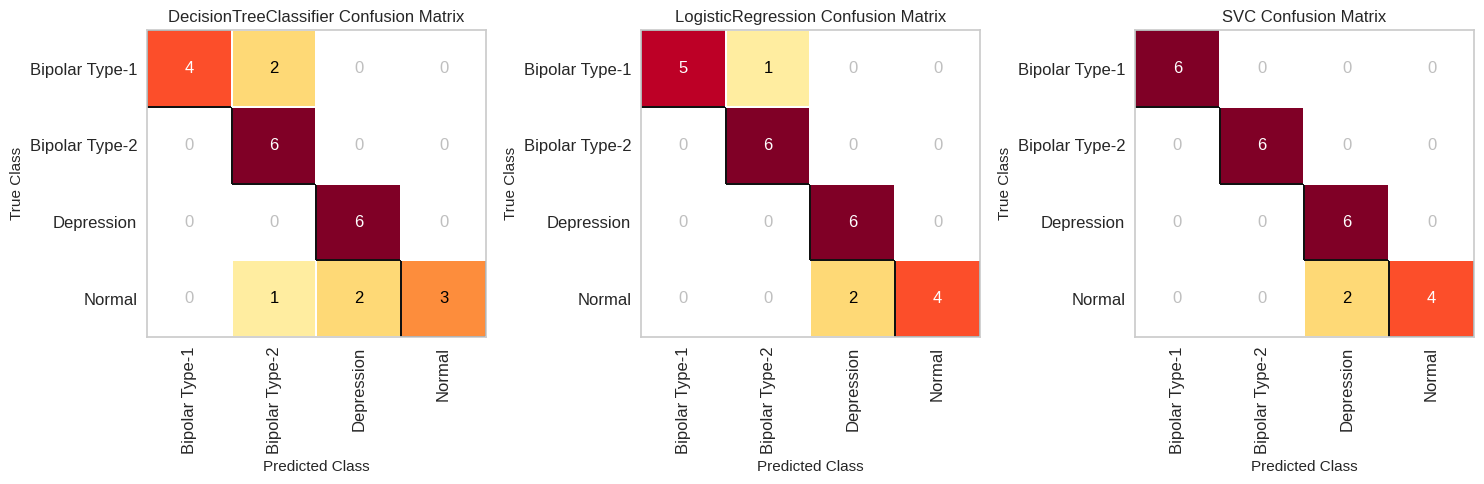

In [243]:
fig, axe = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ConfusionMatrix(classifiers[0], classes=classes, support=True, ax=axe[0]),
              ConfusionMatrix(classifiers[1], classes=classes, support=True, ax=axe[1]),
              ConfusionMatrix(classifiers[2], classes=classes, support=True, ax=axe[2])]
for viz in visualgrid:
  viz.fit(X_train_final_scaled, Y_train_final)
  viz.score(X_test_scaled, y_test)
  viz.finalize()
fig.show()

In the confusion matrices for the test set, a significant improvement in the performance of the linear models compared to the Decision Tree is observed. The linear SVC model achieves perfect classification for the first three disorders and only partially fails in the "Normal" class, where it confuses two cases as "Depression." Logistic Regression also presents robust results, with slight confusion between "Normal" and "Depression," and a single error in classifying "Bipolar Type-1." In contrast, the Decision Tree shows more errors: it confuses two cases of "Bipolar Type-1," one of "Normal" as "Depression," and another as "Bipolar Type-2," indicating a lower generalization capacity compared to the linear models.

### 📈 ROC Curve Comparison

#### Training Set

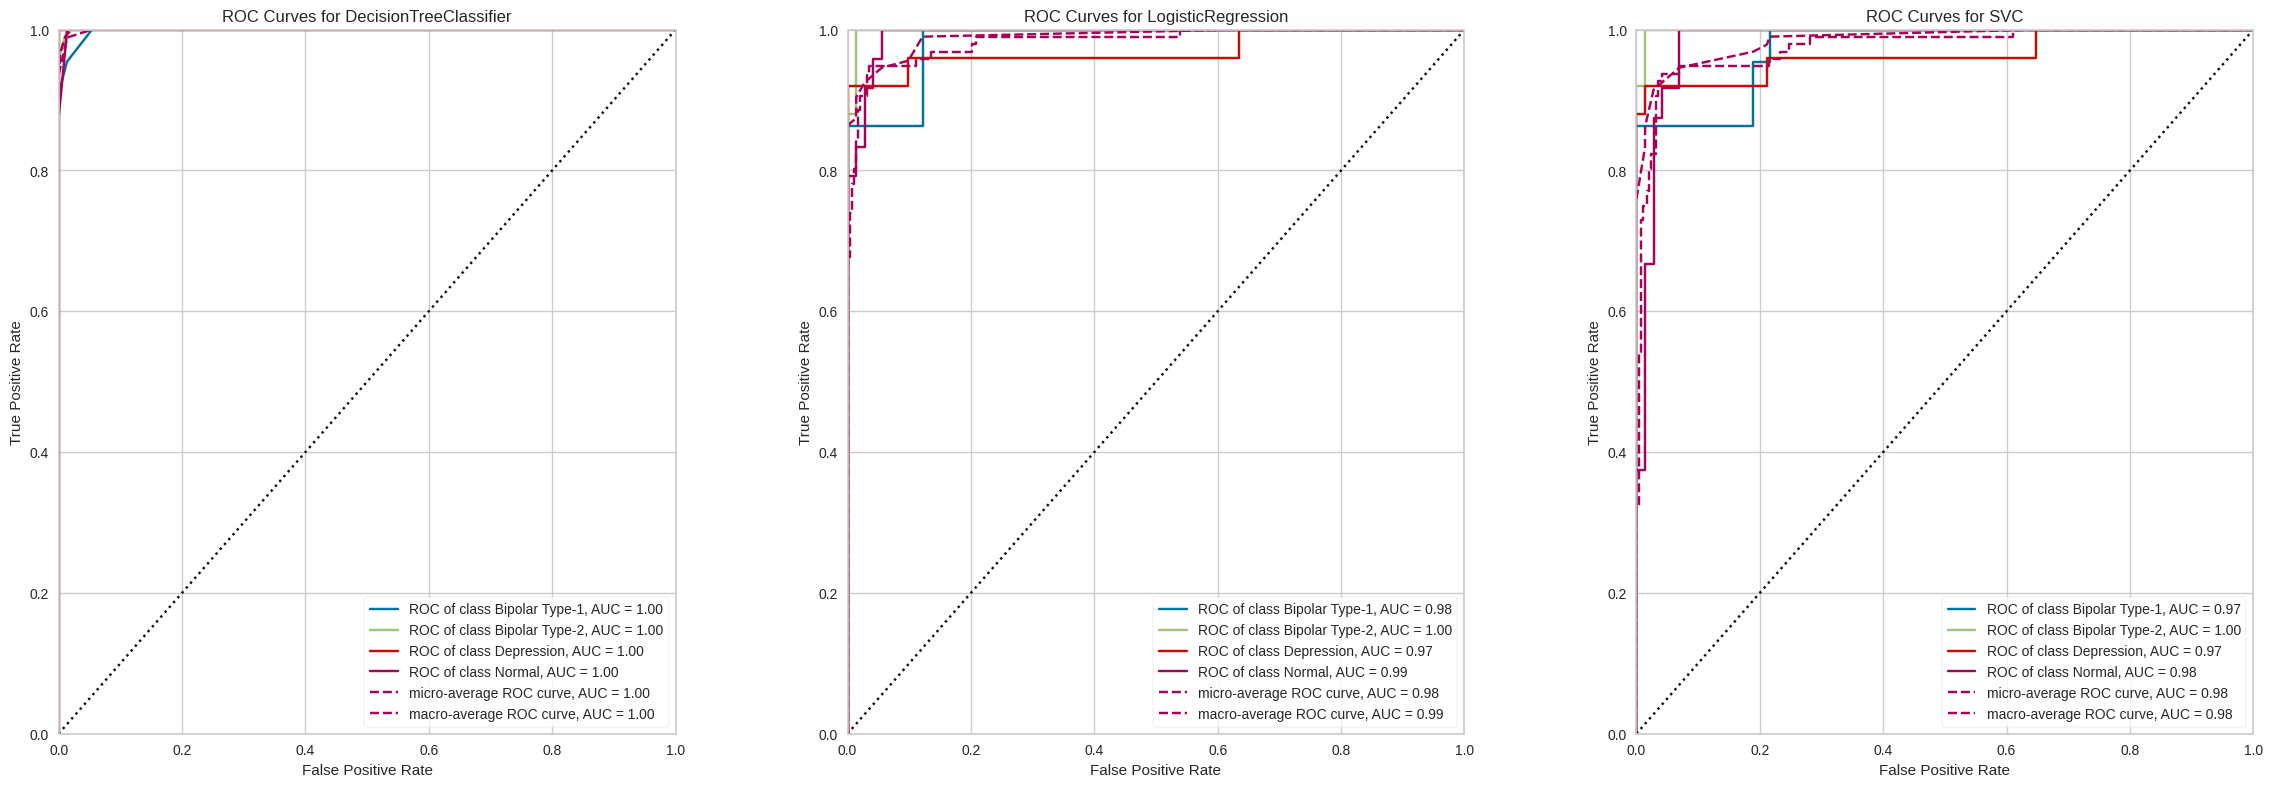

In [244]:
fig, axe = plt.subplots(ncols=3,figsize=(25, 10))
fig.tight_layout(pad=8.0)
visualgrid = [ROCAUC(classifiers[0], classes=classes, ax=axe[0]),
              ROCAUC(classifiers[1], classes=classes, ax=axe[1]),
              ROCAUC(classifiers[2], classes=classes, ax=axe[2])]

for viz in visualgrid:
  viz.fit(X_train_final_scaled, Y_train_final)
  viz.score(X_train_final_scaled, Y_train_final)
  viz.finalize()

plt.show()

Analyzing the ROC curves with the training set, it is evident that all three models perform excellently in terms of class discrimination. The Decision Tree model achieves a perfect AUC of 1.00. Logistic Regression and SVC, meanwhile, maintain very high AUC values ​​(between 0.97 and 1.00), both at the individual class level and in the macro and micro averages, indicating robust and generalizable performance.

#### Test Set

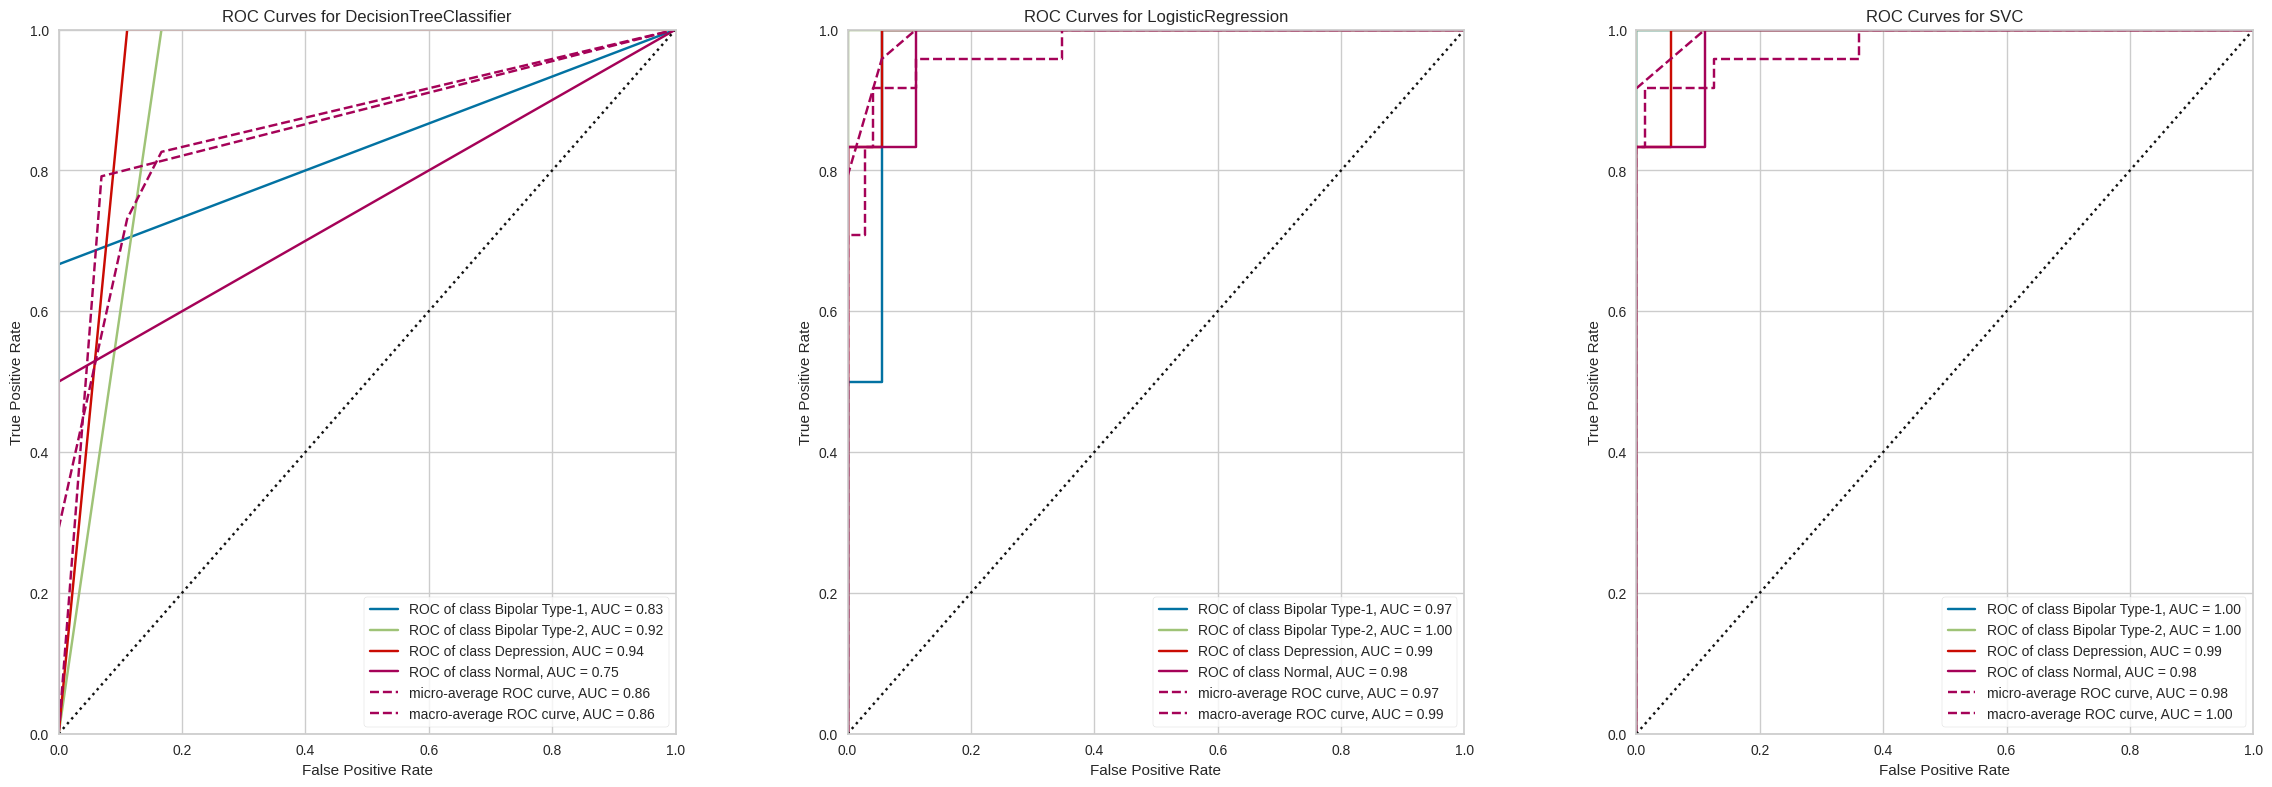

In [245]:
fig, axe = plt.subplots(ncols=3,figsize=(25, 10))
fig.tight_layout(pad=8.0)
visualgrid = [ROCAUC(classifiers[0], classes=classes, ax=axe[0]),
              ROCAUC(classifiers[1], classes=classes, ax=axe[1]),
              ROCAUC(classifiers[2], classes=classes, ax=axe[2])]

for viz in visualgrid:
  viz.fit(X_train_final_scaled, Y_train_final)
  viz.score(X_test_scaled, y_test)
  viz.finalize()

plt.show()

Analyzing the ROC curves with the test set, an improvement in the performance of the Logistic Regression and SVC models is observed. Both present curves very close to the upper left corner of the graph, indicating a good ability to distinguish between classes. Logistic Regression shows high AUC values, close to 1.00 in almost all classes, with a macro and micro mean greater than 0.97, demonstrating a balanced and robust model. The SVC model stands out with perfect AUCs (1.00) for Bipolar Type-1 and Bipolar Type-2, and very high values ​​for the other classes, reaching a macro mean of 1.00 and a micro mean of 0.98, suggesting exceptional performance. In contrast, the Decision Tree model shows more modest performance, with AUCs between 0.75 and 0.94, and means of 0.86, indicating a lower generalization capacity compared to the other two models.

### Class-wise F1-Score Plot 

In [246]:

def plot_f1_scores(model_name, model):
    
    y_pred_train = model.predict(X_train_final_scaled)
    report_train = classification_report(Y_train_final, y_pred_train, output_dict=True)
    df_train = pd.DataFrame(report_train).T.loc[classes]

    y_pred_test = model.predict(X_test_scaled)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    df_test = pd.DataFrame(report_test).T.loc[classes]

    trace_train = go.Scatter(
        x=classes,
        y=df_train['f1-score'],
        mode='lines+markers',
        name=f"{model_name} - Train"
    )

    trace_test = go.Scatter(
        x=classes,
        y=df_test['f1-score'],
        mode='lines+markers',
        name=f"{model_name} - Test"
    )

    layout = go.Layout(
        title=f'F1-score per Class - {model_name}',
        xaxis=dict(title='Class'),
        yaxis=dict(title='F1-score', range=[0, 1.1]),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_train, trace_test], layout=layout)
    fig.show()


In [247]:
plot_f1_scores("Decision Tree", clf_dtc_model_final)

The model is observed to achieve consistently high F1 scores on the training set for all classes. However, on the test set, while the F1 scores for the 'Bipolar Type-1', 'Bipolar Type-2', and 'Depression' classes are good (greater than or equal to 0.8), the 'Normal' class shows a notable drop in the test F1 score, indicating poorer model performance in classifying this specific class on unseen data.

<small> 📓 Graph in: outputs/F1-score per Class - Decision Tree.png </small>




In [248]:
plot_f1_scores("Decision Tree", clf_log_model_final)

High F1 scores are observed in both sets for 'Bipolar Type-2,' which stands out with the best performance. However, while 'Bipolar Type-1' and 'Depression' maintain acceptable performance on test (F1 score > 0.85), the 'Normal' class experiences a notable drop, suggesting greater difficulty for the model in generalizing the classification of this class.

<small> 📓 Graph in: outputs/F1-score per Class - Logistic Regression.png</small>

In [249]:
plot_f1_scores("SVC linear", clf_svc_final)

A perfect F1 score (1.0) is observed in the test set for the 'Bipolar Type-1' and 'Bipolar Type-2' classes. However, for the 'Depression' and 'Normal' classes, there is a more noticeable gap between training and test, indicating a greater difficulty for the model to generalize well in these classes. The 'Normal' class shows the lowest performance on the test set (0.80).

<small> 📓 Graph in: outputs/F1-score per Class - SVC linear.png</small>

## Conclusion

Based on the analysis, it was observed that, although the Decision Tree model presented outstanding performance on the training set, its performance on the test data evidenced marked overfitting, with a significant decrease in accuracy and generalization capacity. In contrast, both Logistic Regression and Kernel Linear SVC demonstrated a solid ability to generalize to unseen data. However, the Linear SVC model stood out as the most suitable option, as it achieved perfect classification for the 'Bipolar Type-1' and 'Bipolar Type-2' classes, while maintaining comparable performance to logistic regression in the 'Depression' and 'Normal' classes. Due to its consistency, balance, and accuracy across all groups, the Linear SVC model was ultimately selected as the best alternative for classifying new data.